In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
import os
import tensorflow as tf
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation, AveragePooling2D
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, RandomWidth, RandomHeight, Lambda
from tensorflow.keras.layers import SeparableConv2D, add, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.utils import image_dataset_from_directory


# Data Collection

In [2]:
# install gdown package to download files from Google Drive
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# download sign_language.zip from my Google Drive
!gdown --id 1RIrFK85tkcv0VffylXzPGGuML6CApNHr

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RIrFK85tkcv0VffylXzPGGuML6CApNHr
To: /content/sign_language.zip
100% 17.1M/17.1M [00:00<00:00, 169MB/s]


In [4]:
# let unzip sign_language.zip 
!unzip sign_language.zip

Archive:  sign_language.zip
   creating: dataset/
   creating: dataset/test/
   creating: dataset/test/0/
  inflating: dataset/test/0/IMG_4159.JPG  
  inflating: dataset/test/0/IMG_4725.JPG  
  inflating: dataset/test/0/IMG_4976.JPG  
  inflating: dataset/test/0/IMG_5572.JPG  
  inflating: dataset/test/0/IMG_5695.JPG  
   creating: dataset/test/1/
  inflating: dataset/test/1/IMG_4497.JPG  
  inflating: dataset/test/1/IMG_5309.JPG  
  inflating: dataset/test/1/IMG_5340.JPG  
  inflating: dataset/test/1/IMG_5401.JPG  
  inflating: dataset/test/1/IMG_5992.JPG  
   creating: dataset/test/2/
  inflating: dataset/test/2/IMG_4727.JPG  
  inflating: dataset/test/2/IMG_5342.JPG  
  inflating: dataset/test/2/IMG_5594.JPG  
  inflating: dataset/test/2/IMG_5707.JPG  
  inflating: dataset/test/2/IMG_5718.JPG  
   creating: dataset/test/3/
  inflating: dataset/test/3/IMG_4184.JPG  
  inflating: dataset/test/3/IMG_5114.JPG  
  inflating: dataset/test/3/IMG_5279.JPG  
  inflating: dataset/test/3/IMG_5

In [5]:
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [6]:
# load the data into train_dir, val_dir, and test_dir variables then generate batches of tensor image
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size = (100,100),
    batch_size = 64
)
val_dataset = image_dataset_from_directory(
    validation_dir,
    image_size = (100,100),
    batch_size = 64
)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size = (100,100),
    batch_size = 64
)

Found 1712 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
Found 50 files belonging to 10 classes.


In [7]:
# try looking what is inside in each train_dataset
for data_batch, labels_batch in train_dataset.take(1):
  print("data batch shape", data_batch.shape)
  print("data batch shape", labels_batch.shape)
  print("labels_batch", labels_batch)

data batch shape (64, 100, 100, 3)
data batch shape (64,)
labels_batch tf.Tensor(
[2 7 0 3 0 1 3 0 4 4 8 5 3 4 1 7 2 5 6 4 6 9 4 3 2 0 7 9 0 7 6 4 0 7 7 7 5
 2 8 1 1 9 5 9 3 5 3 5 8 1 8 7 4 0 1 7 3 6 9 0 0 5 4 1], shape=(64,), dtype=int32)


In [8]:
# callbacks

early_stopping_cb = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint_cb1 = ModelCheckpoint('model_scratch/woaugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb2 = ModelCheckpoint('model_scratch/waugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb3 = ModelCheckpoint('model_feature_extraction/woaugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb4 = ModelCheckpoint('model_feature_extraction/waugment', monitor='val_loss',save_best_only=True, save_weights_only=True)
model_checkpoint_cb5 = ModelCheckpoint('model_fine_tuning/woaugment', monitor='val_loss',save_best_only=True,save_weights_only=True)
model_checkpoint_cb6 = ModelCheckpoint('model_fine_tuning/waugment', monitor='val_loss',save_best_only=True,save_weights_only=True)
reduce_lr_cb = ReduceLROnPlateau(min_lr=0.001)

In [9]:
# augmentation part
data_augmentation = Sequential(
  [
    RandomRotation(0.1),
    RandomZoom(0.2),
    RandomFlip('horizontal')
  ]
)

# Train Model from Scratch

    แบบที่ 1 Train From Scratch
  - train model เบื้องต้นแบบสร้าง architecture เอง 
  - โดยใช้ image shape ที่ 100,100, 3 

In [ ]:
# build model
def build_model_scratch():
  #fill your code
  model = Sequential()

  # change the input shape here
  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(100,100,3)))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.3))

  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
# compile and fit model
model = build_model_scratch()

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_dataset, epochs=20, validation_data=val_dataset, verbose=1,
                    callbacks=[model_checkpoint_cb1,reduce_lr_cb])

Epoch 1/20
27/27 [==============================] - 17s 211ms/step - loss: 2.3369 - accuracy: 0.2190 - val_loss: 3.0735 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/20
27/27 [==============================] - 3s 116ms/step - loss: 1.4881 - accuracy: 0.4685 - val_loss: 1.8770 - val_accuracy: 0.3100 - lr: 0.0010
Epoch 3/20
27/27 [==============================] - 3s 115ms/step - loss: 0.9531 - accuracy: 0.6834 - val_loss: 4.9174 - val_accuracy: 0.1367 - lr: 0.0010
Epoch 4/20
27/27 [==============================] - 3s 111ms/step - loss: 0.6978 - accuracy: 0.7669 - val_loss: 4.5224 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 5/20
27/27 [==============================] - 3s 119ms/step - loss: 0.4432 - accuracy: 0.8581 - val_loss: 1.0826 - val_accuracy: 0.6467 - lr: 0.0010
Epoch 6/20
27/27 [==============================] - 3s 111ms/step - loss: 0.4341 - accuracy: 0.8563 - val_loss: 1.7307 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 7/20
27/27 [==============================] - 3s 121ms/step - l

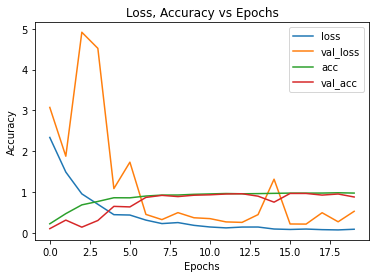

In [ ]:
#plot the learning curves
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.title('Loss, Accuracy vs Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# model ไม่ overfitting

In [ ]:
# test set performance
loss, acc = model.evaluate(test_dataset)
print('test_oss:', loss)
print('test_acc:', acc)

1/1 [==============================] - 1s 756ms/step - loss: 0.1403 - accuracy: 0.9800
test_oss: 0.14027807116508484
test_acc: 0.9800000190734863


# Pretrained Model as a Classifier

  แบบที่ 2 Pretrained Model as a Classifier
   - ใช้ pretrained model ที่เป็น Xception โดยการสร้าง instance ของ Xception และกำหนด shape input ที่จะป้อนเข้า model 299,299,3 และ ใช้ weight ที่ train มาแล้วจาก imagenet
   - นำโมเดลไปทำนายภายใน test set 50 ภาพ แสดงผลการทำนายว่าภาพแต่ละภาพ model ทำนายออกมาเป็น ชื่อ label (xx%) และวัดค่า Accuracy ใน test set ออกมา 

In [38]:
# load the data into train_dir, val_dir, and test_dir variables then generate batches of tensor image
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size = (299,299),
    batch_size = 64
)
val_dataset = image_dataset_from_directory(
    validation_dir,
    image_size = (299,299),
    batch_size = 64
)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size = (299,299),
    batch_size = 64
)

Found 1712 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
Found 50 files belonging to 10 classes.


In [39]:
# load the Xception model and its pretrained weights
# https://keras.io/api/applications/xception/
model = Xception(weights="imagenet", include_top=True,input_shape=(299,299,3))
model.summary() 

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [29]:
pred = model.predict(test_dataset)
label = decode_predictions(pred)
for i in range(50):
  print(f'{label[i][0][1]}({label[i][0][2]:.2f}%)')

1/1 [==============================] - 3s 3s/step
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
safety_pin(0.96%)
mixing_bowl(1.00%)
safety_pin(1.00%)
mixing_bowl(1.00%)
safety_pin(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
safety_pin(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
safety_pin(0.91%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
safety_pin(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)
mixing_bowl(1.00%)


In [ ]:
# เนื่องจาก model Xception ยังไม่ได้ผ่านการ Train ข้อมูลด้วยรูปภาพ Sign language จึงทำให้ output มีทั้งหมด 1000 คลาส
# แล้วจึงทำนายรูปภาพ sign language เป็น อย่างอื่นทุกรูป แทนที่จะเป็น ตัวเลข 0-9
# จึงสรุปได้ว่ามีความแม่นยำ 0%

# Pretrained Model as a Feature Extractor

   แบบที่ 3 Pretrained Model as a Feature Extractor 
  -  ใช้ pretrained model ที่เป็น Xception เช่นเดิม แต่ตัด layer ที่ใช้ในการ classification ออก
  -   สร้าง Model 2 แบบย่อย (1) แบบไม่มีการ augmentation (2) แบบใช้ augmentation โดยในส่วน Classification part ออกแบบเอง

In [ ]:
# without data augmentation
# include_top=False - remove the classifier part from this model 
conv_base = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
# extracting features as NumPy arrays by calling the predict() method of the xception model on our training, validation, and testing datasets.
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_image = preprocess_input(images)
    features = conv_base.predict(preprocessed_image)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features),np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(val_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)
train_features.shape # (1712, 10, 10, 2048)

#ทำ preprocess input หรือ normalization รูปภาพ method of the xception model

2/2 [==============================] - 0s 231ms/step


(1712, 10, 10, 2048)

In [ ]:
last_layer = conv_base.get_layer('block14_sepconv2_act')
last_layer.output_shape

(None, 10, 10, 2048)

In [ ]:
# build model
def build_model_feature_extractor1():
  # Fill your code
  model = Sequential()
  model.add(Flatten(input_shape=(last_layer.output_shape[1:])))   #ต่อ feature extraction กับ Top เข้าด้วยกัน
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
# train without data augmentation
model = build_model_feature_extractor1()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 204800)            0         
                                                                 
 dense_17 (Dense)            (None, 256)               52429056  
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                2570      
                                                                 
Total params: 52,431,626
Trainable params: 52,431,626
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Freezing a layer
conv_base.trainable = False

#ล็อคทุกชั้น Layer ใน Xception ไม่ให้ Train ได้

In [ ]:
# compile and fit model
# train without data augmentation
model = build_model_feature_extractor1()

model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_features, train_labels, epochs=20, validation_data=(val_features, val_labels), verbose=1,
                    callbacks=[model_checkpoint_cb3,reduce_lr_cb])

Epoch 1/20
54/54 [==============================] - 2s 32ms/step - loss: 6.0965 - accuracy: 0.4188 - val_loss: 1.0888 - val_accuracy: 0.6267 - lr: 0.0010
Epoch 2/20
54/54 [==============================] - 1s 27ms/step - loss: 1.2593 - accuracy: 0.5584 - val_loss: 0.7395 - val_accuracy: 0.7533 - lr: 0.0010
Epoch 3/20
54/54 [==============================] - 1s 27ms/step - loss: 1.1002 - accuracy: 0.6151 - val_loss: 0.6641 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 4/20
54/54 [==============================] - 1s 27ms/step - loss: 1.0069 - accuracy: 0.6612 - val_loss: 0.5480 - val_accuracy: 0.8633 - lr: 0.0010
Epoch 5/20
54/54 [==============================] - 1s 26ms/step - loss: 0.9089 - accuracy: 0.6998 - val_loss: 0.6440 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 6/20
54/54 [==============================] - 1s 27ms/step - loss: 0.7661 - accuracy: 0.7377 - val_loss: 0.4584 - val_accuracy: 0.8567 - lr: 0.0010
Epoch 7/20
54/54 [==============================] - 1s 27ms/step - loss: 0.7

In [ ]:
# test set performance
loss, acc = model.evaluate(test_features,test_labels)
print('test_oss:', loss)
print('test_acc:', acc)

2/2 [==============================] - 0s 12ms/step - loss: 0.1460 - accuracy: 0.9600
test_oss: 0.14597532153129578
test_acc: 0.9599999785423279


In [ ]:
# with data augmentation 
conv_base = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
def build_model_feature_extractor2():
  model = Sequential()
  model.add(Input(shape=(299,299,3)))
  model.add(data_augmentation)
  model.add(Lambda(lambda x: preprocess_input(x)))
  model.add(conv_base)    #ต่อ feature extraction กับ Top เข้าด้วยกัน
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  return model

In [ ]:
# train with data augmentation
model = build_model_feature_extractor2()
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 lambda_2 (Lambda)           (None, 299, 299, 3)       0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten_12 (Flatten)        (None, 204800)            0         
                                                                 
 dense_25 (Dense)            (None, 256)               52429056  
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 10)              

In [ ]:
# Freezing a layer
conv_base.trainable = False

#ล็อคทุกชั้น Layer ใน Xception ไม่ให้ Train ได้

In [ ]:
# compile and fit model
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_dataset, epochs=20, validation_data=val_dataset, verbose=1,callbacks=[model_checkpoint_cb4,reduce_lr_cb])

Epoch 1/20
27/27 [==============================] - 23s 742ms/step - loss: 9.1725 - accuracy: 0.2447 - val_loss: 1.8414 - val_accuracy: 0.3733 - lr: 0.0010
Epoch 2/20
27/27 [==============================] - 21s 746ms/step - loss: 1.9371 - accuracy: 0.3113 - val_loss: 1.6276 - val_accuracy: 0.4467 - lr: 0.0010
Epoch 3/20
27/27 [==============================] - 21s 744ms/step - loss: 1.8019 - accuracy: 0.3411 - val_loss: 1.4939 - val_accuracy: 0.4233 - lr: 0.0010
Epoch 4/20
27/27 [==============================] - 20s 721ms/step - loss: 1.7161 - accuracy: 0.3826 - val_loss: 1.4170 - val_accuracy: 0.5567 - lr: 0.0010
Epoch 5/20
27/27 [==============================] - 21s 772ms/step - loss: 1.6807 - accuracy: 0.3908 - val_loss: 1.3708 - val_accuracy: 0.5067 - lr: 0.0010
Epoch 6/20
27/27 [==============================] - 20s 735ms/step - loss: 1.5940 - accuracy: 0.4112 - val_loss: 1.2358 - val_accuracy: 0.6333 - lr: 0.0010
Epoch 7/20
27/27 [==============================] - 21s 758ms/st

In [ ]:
# test set performance
loss, acc = model.evaluate(test_dataset)
print('test_oss:', loss)
print('test_acc:', acc)

1/1 [==============================] - 0s 470ms/step - loss: 0.8731 - accuracy: 0.7400
test_oss: 0.8731141686439514
test_acc: 0.7400000095367432


# Fine-tuned 

  แบบที่ 4 Fine Tuning 
  - ใช้ pretrained model ที่เป็น Xception เช่นเดิม แต่ตัด layer ที่ใช้ในการ classification ออก ทำการ Freeze Weight ของ Xception 40% โดยในส่วน Classification part     ออกแบบเอง
  - สร้าง Model 2 แบบย่อย (1) แบบไม่มีการ augmentation (2) แบบไม่ใช้ augmentation 

In [ ]:
# load the data into train_dir, val_dir, and test_dir variables then generate batches of tensor image
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size = (200,200),
    batch_size = 64
)
val_dataset = image_dataset_from_directory(
    validation_dir,
    image_size = (200,200),
    batch_size = 64
)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size = (200,200),
    batch_size = 64
)

#ลดขนาด Width กับ Height ของ Image ลงมาที่ (200,200)

Found 1712 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
Found 50 files belonging to 10 classes.


In [ ]:
# without data augmentation
conv_base = Xception(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 99, 99, 32)   864         ['input_24[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 99, 99, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [ ]:
# extracting features as NumPy arrays by calling the predict() method of the VGG model on our training, validation, and testing datasets.
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_image = preprocess_input(images)
    features = conv_base.predict(preprocessed_image)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features),np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(val_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)
train_features.shape # (1712, 7, 7, 2048)

2/2 [==============================] - 0s 101ms/step


(1712, 7, 7, 2048)

In [ ]:
print("Model number of layers: {}\n".format(len(conv_base.layers)))

# Model number of layers: 132  
# freeze 40 % ดังนั้นจะ freeze 53 layers แรก 

Model number of layers: 132



In [ ]:
# build model
def build_model_fine_tuning1():
  inputs = Input(shape=(200,200,3))
  x = preprocess_input(inputs)
  x = conv_base(x)
  x = Flatten()(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.5)(x)
  outputs = Dense(10, activation='softmax')(x)
  model = Model(inputs,outputs)
  return model

In [ ]:
model = build_model_fine_tuning1()
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 tf.math.truediv_5 (TFOpLamb  (None, 200, 200, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_5 (TFOpLam  (None, 200, 200, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_18 (Flatten)        (None, 100352)            0         
                                                                 
 dense_37 (Dense)            (None, 256)               2569

In [ ]:
# Freezing a layer
for layer in conv_base.layers[:53]:
        layer.trainable = False

# freeze 40 % ดังนั้นจะ freeze 53 layers แรก 

In [ ]:
# compile and fit model
model.compile(optimizer=Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999),
                 loss= 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])

history = model.fit(train_dataset, epochs=20, batch_size=64,
                    validation_data=val_dataset, callbacks=[model_checkpoint_cb5,reduce_lr_cb])

Epoch 1/20
27/27 [==============================] - 26s 818ms/step - loss: 1.9206 - accuracy: 0.3487 - val_loss: 1.7865 - val_accuracy: 0.4300 - lr: 1.0000e-05
Epoch 2/20
27/27 [==============================] - 18s 659ms/step - loss: 0.9509 - accuracy: 0.7068 - val_loss: 1.1919 - val_accuracy: 0.5933 - lr: 1.0000e-05
Epoch 3/20
27/27 [==============================] - 18s 658ms/step - loss: 0.4857 - accuracy: 0.8569 - val_loss: 0.7109 - val_accuracy: 0.7867 - lr: 1.0000e-05
Epoch 4/20
27/27 [==============================] - 18s 671ms/step - loss: 0.2673 - accuracy: 0.9194 - val_loss: 0.4500 - val_accuracy: 0.8667 - lr: 1.0000e-05
Epoch 5/20
27/27 [==============================] - 19s 690ms/step - loss: 0.1631 - accuracy: 0.9614 - val_loss: 0.3320 - val_accuracy: 0.9033 - lr: 1.0000e-05
Epoch 6/20
27/27 [==============================] - 19s 707ms/step - loss: 0.1084 - accuracy: 0.9772 - val_loss: 0.2600 - val_accuracy: 0.9233 - lr: 1.0000e-05
Epoch 7/20
27/27 [======================

In [ ]:
# test set performance
loss, acc = model.evaluate(test_dataset)
print('test_oss:', loss)
print('test_acc:', acc)

1/1 [==============================] - 2s 2s/step - loss: 0.1350 - accuracy: 0.9600
test_oss: 0.1350451409816742
test_acc: 0.9599999785423279


In [ ]:
# with data augmentation
conv_base = Xception(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 99, 99, 32)   864         ['input_26[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 99, 99, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [ ]:
def build_model_fine_tuning2():
  inputs = Input(shape=(200,200,3))
  x = data_augmentation(inputs)
  x = preprocess_input(x)
  x = conv_base(x)
  x = Flatten()(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.5)(x)
  outputs = Dense(10, activation='softmax')(x)
  model = Model(inputs,outputs)
  return model

In [ ]:
model = build_model_fine_tuning2()
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 tf.math.truediv_7 (TFOpLamb  (None, 200, 200, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_7 (TFOpLam  (None, 200, 200, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_20 (Flatten)        (None, 100352)            0   

In [ ]:
# Freezing a layer
for layer in conv_base.layers[:53]:
        layer.trainable = False

# freeze 40 % ดังนั้นจะ freeze 53 layers แรก 

In [ ]:
# compile and fit model
model.compile(optimizer=Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999),
                 loss= 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])

history = model.fit(train_dataset, epochs=20, batch_size=64,
                    validation_data=val_dataset, callbacks=[model_checkpoint_cb6,reduce_lr_cb])

Epoch 1/20
27/27 [==============================] - 25s 763ms/step - loss: 2.1638 - accuracy: 0.2465 - val_loss: 1.9696 - val_accuracy: 0.3500 - lr: 1.0000e-05
Epoch 2/20
27/27 [==============================] - 21s 773ms/step - loss: 1.5641 - accuracy: 0.4632 - val_loss: 1.5182 - val_accuracy: 0.5167 - lr: 1.0000e-05
Epoch 3/20
27/27 [==============================] - 22s 781ms/step - loss: 1.1300 - accuracy: 0.6262 - val_loss: 1.0790 - val_accuracy: 0.6667 - lr: 1.0000e-05
Epoch 4/20
27/27 [==============================] - 21s 771ms/step - loss: 0.8312 - accuracy: 0.7185 - val_loss: 0.7495 - val_accuracy: 0.7800 - lr: 1.0000e-05
Epoch 5/20
27/27 [==============================] - 21s 767ms/step - loss: 0.6365 - accuracy: 0.7839 - val_loss: 0.5409 - val_accuracy: 0.8167 - lr: 1.0000e-05
Epoch 6/20
27/27 [==============================] - 21s 772ms/step - loss: 0.5558 - accuracy: 0.8131 - val_loss: 0.4221 - val_accuracy: 0.8533 - lr: 1.0000e-05
Epoch 7/20
27/27 [======================

In [ ]:
# test set performance
loss, acc = model.evaluate(test_dataset)
print('test_oss:', loss)
print('test_acc:', acc)

1/1 [==============================] - 0s 280ms/step - loss: 0.1735 - accuracy: 0.9400
test_oss: 0.1735014021396637
test_acc: 0.9399999976158142
